# Neuronales Netzwerk - W6_Saisonbrot
Baisert Basiert auf Kopie von neural_net_estimation_with_dropout.ipynb.

## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [1]:

# Import the necessary libraries
import pandas as pd
import requests
import io

# Define the file paths
subdirectory = "pickle_data//W6_Saisonbrot"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (236, 5)
Loaded Validation features dimensions: (56, 5)
Loaded Test features dimensions: (364, 5)

Loaded Training labels dimensions: (236, 1)
Loaded Validation labels dimensions: (56, 1)
Loaded Test labels dimensions: (364, 1)

First few rows of loaded training features:
   Weihnachtsmarkt_1.0  Temperatur  Friday_1.0  Sonnenschein  Werktag_1.0
0                    0     12.6875           0      0.303030            1
1                    0     11.8875           1      0.030519            1
2                    0     16.7750           0      0.287179            0
3                    0     14.9875           0      0.196281            0
4                    0     10.7750           0      0.052356            1

First few rows of loaded training labels:
      Umsatz
0  41.813038
1  16.410876
2  18.574458
3  24.640084
4  43.515366


In [2]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.         12.6875      0.          0.3030303   1.        ]
 [ 0.         11.8875      1.          0.03051882  1.        ]
 [ 0.         16.775       0.          0.28717949  0.        ]
 [ 0.         14.9875      0.          0.19628099  0.        ]
 [ 0.         10.775       0.          0.05235602  1.        ]]


## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dropout(.3),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2025-01-02 21:52:51.353662: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 21:52:51.355007: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 21:52:51.357874: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 21:52:51.366453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735854771.383498   19760 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735854771.39

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 10 (40.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [4]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=8,
                    validation_data=(validation_features, validation_labels))

Epoch 1/8


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5468.5220 - val_loss: 5499.5615
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5597.5410 - val_loss: 5458.0103
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5452.2563 - val_loss: 5429.3291
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5454.8315 - val_loss: 5404.9912
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5613.7236 - val_loss: 5385.5103
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5598.6885 - val_loss: 5369.1685
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5355.1206 - val_loss: 5354.4033
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5339.0464 - val_loss: 5341.5718


## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [5]:
model.save("python_model_W6_Saisonbrot.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

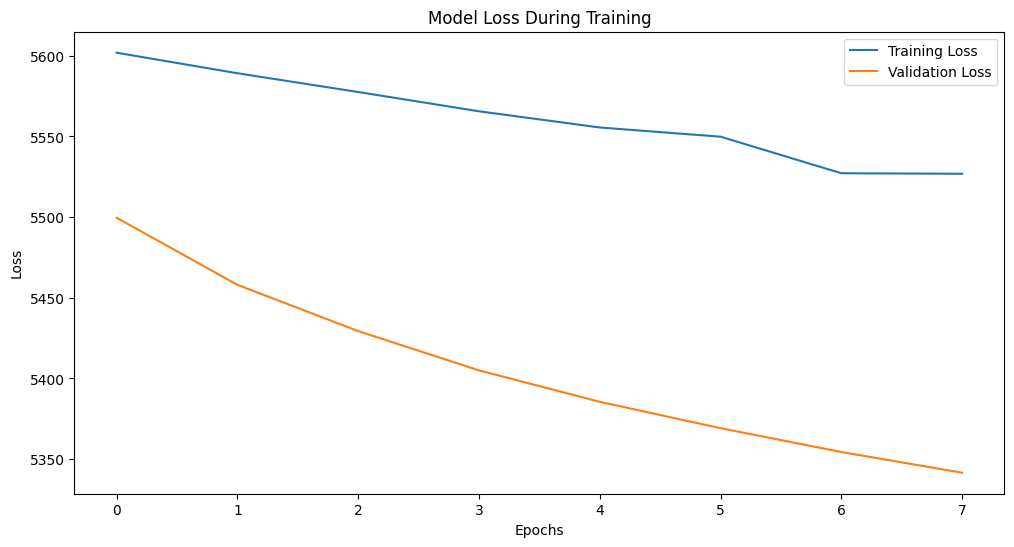

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [7]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
test_predictions = model.predict(test_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 99.54%
MAPE on the Validation Data: 99.47%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


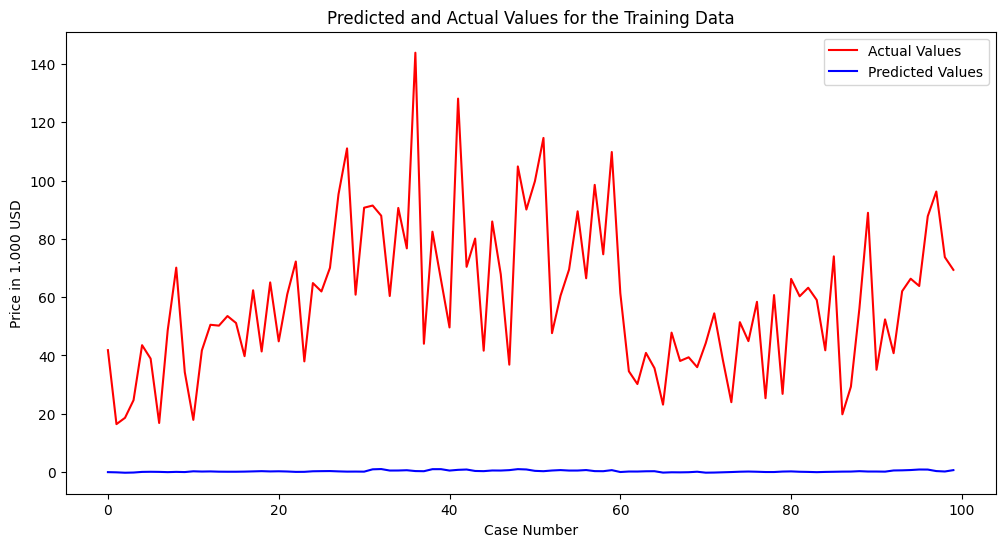

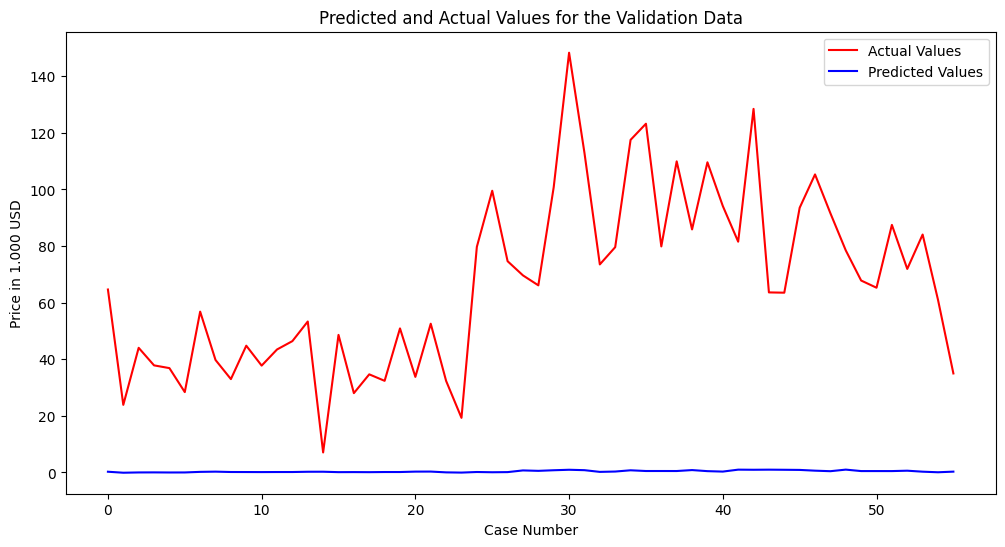

In [8]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## Export predictions data

In [9]:
#Datum zu predicted Umsatzdaten hinzufügen

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(test_predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, test_predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)

#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe1_df = df_test_csv[df_test_csv["Warengruppe"] == 6].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe1_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/3_Neuronal_Model/Predictions/W6_Saisonbrot_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

          Datum    Umsatz
0    2018-08-01 -0.519637
1    2018-08-02 -0.602512
2    2018-08-03 -0.928474
3    2018-08-04 -0.582518
4    2018-08-05 -0.444391
..          ...       ...
359  2019-07-26 -0.969559
360  2019-07-27 -0.540724
361  2019-07-28 -0.533559
362  2019-07-29 -0.600228
363  2019-07-30 -0.427781

[364 rows x 2 columns]
         id       Datum  Warengruppe    Umsatz
0   1811016  2018-11-01            6 -0.020676
1   1811026  2018-11-02            6 -0.043451
2   1811036  2018-11-03            6  0.054448
3   1811046  2018-11-04            6  0.044867
4   1811056  2018-11-05            6  0.024521
5   1811066  2018-11-06            6  0.126465
6   1811076  2018-11-07            6  0.033954
7   1811086  2018-11-08            6 -0.021506
8   1811096  2018-11-09            6  0.014681
9   1811106  2018-11-10            6 -0.077404
10  1811116  2018-11-11            6 -0.105384
11  1811126  2018-11-12            6  0.017848
12  1811136  2018-11-13            6  0.031128
13  18